<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
data = pd.read_csv("/datasets/insurance.csv")

In [ ]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [ ]:
data.shape

(5000, 5)

In [ ]:
data["Члены семьи"].value_counts()

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

In [ ]:
data['Возраст'].unique().astype('int')

array([41, 46, 29, 21, 28, 43, 39, 25, 36, 32, 38, 23, 40, 34, 26, 42, 27,
       33, 47, 30, 19, 31, 22, 20, 24, 18, 37, 48, 45, 44, 52, 49, 35, 56,
       65, 55, 57, 54, 50, 53, 51, 58, 59, 60, 61, 62])

In [ ]:
data['Возраст'].value_counts()

19.0    223
25.0    214
31.0    212
26.0    211
27.0    209
22.0    209
32.0    206
28.0    204
29.0    203
30.0    202
23.0    202
21.0    200
20.0    195
36.0    193
33.0    191
24.0    182
35.0    179
34.0    177
37.0    147
39.0    141
38.0    139
41.0    129
18.0    117
40.0    114
42.0     93
43.0     77
44.0     74
45.0     73
46.0     60
47.0     47
49.0     37
50.0     27
48.0     26
52.0     22
51.0     21
53.0     11
55.0      9
54.0      7
56.0      5
59.0      3
60.0      2
58.0      2
57.0      2
65.0      1
61.0      1
62.0      1
Name: Возраст, dtype: int64

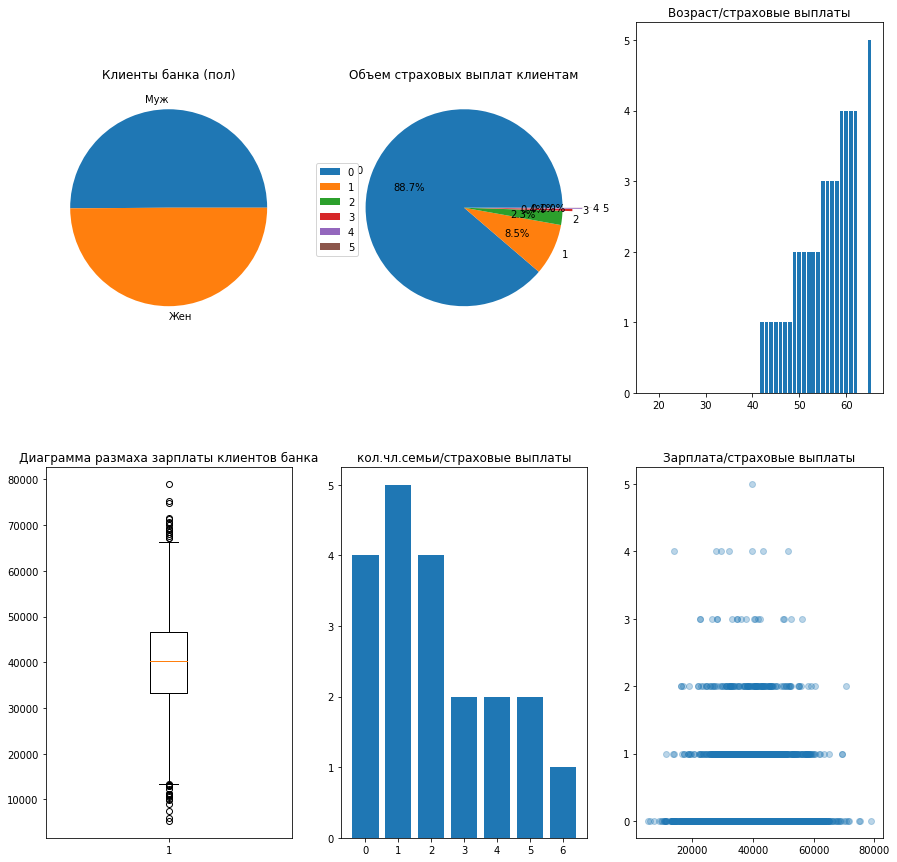

In [ ]:
figure, axis = plt.subplots(2, 3, figsize=(15, 15))


axis[0, 0].pie(data['Пол'].value_counts(), labels=['Муж','Жен']);
axis[0, 0].set_title("Клиенты банка (пол)")


X= data["Страховые выплаты"].value_counts()
explode = (0, 0, 0, 0.1, 0.2, 0.3)

axis[0, 1].pie(data["Страховые выплаты"].value_counts(), labels=[0,1,2,3,4,5], autopct='%1.1f%%', explode= explode)
axis[0, 1].set_title("Объем страховых выплат клиентам")
axis[0, 1].legend(bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25), loc = 'best', labels = [0,1,2,3,4,5])


axis[0, 2].bar(data['Возраст'], data["Страховые выплаты"]);
axis[0, 2].set_title("Возраст/страховые выплаты")

axis[1, 0].boxplot(data["Зарплата"])
axis[1, 0].set_title("Диаграмма размаха зарплаты клиентов банка")


axis[1, 1].bar(data["Члены семьи"], data["Страховые выплаты"])
axis[1, 1].set_title("кол.чл.семьи/страховые выплаты")

axis[1, 2].scatter(data['Зарплата'], data['Страховые выплаты'], alpha=0.3)
axis[1,2].set_title("Зарплата/страховые выплаты")


plt.show()

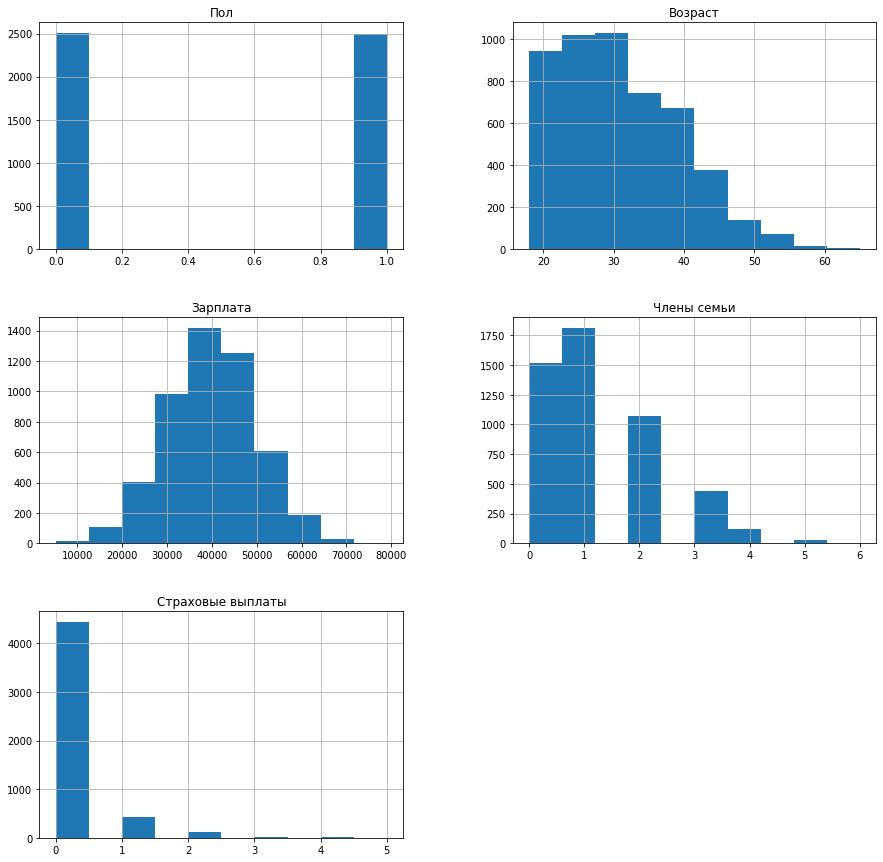

In [ ]:
data.hist(figsize=(15,15));

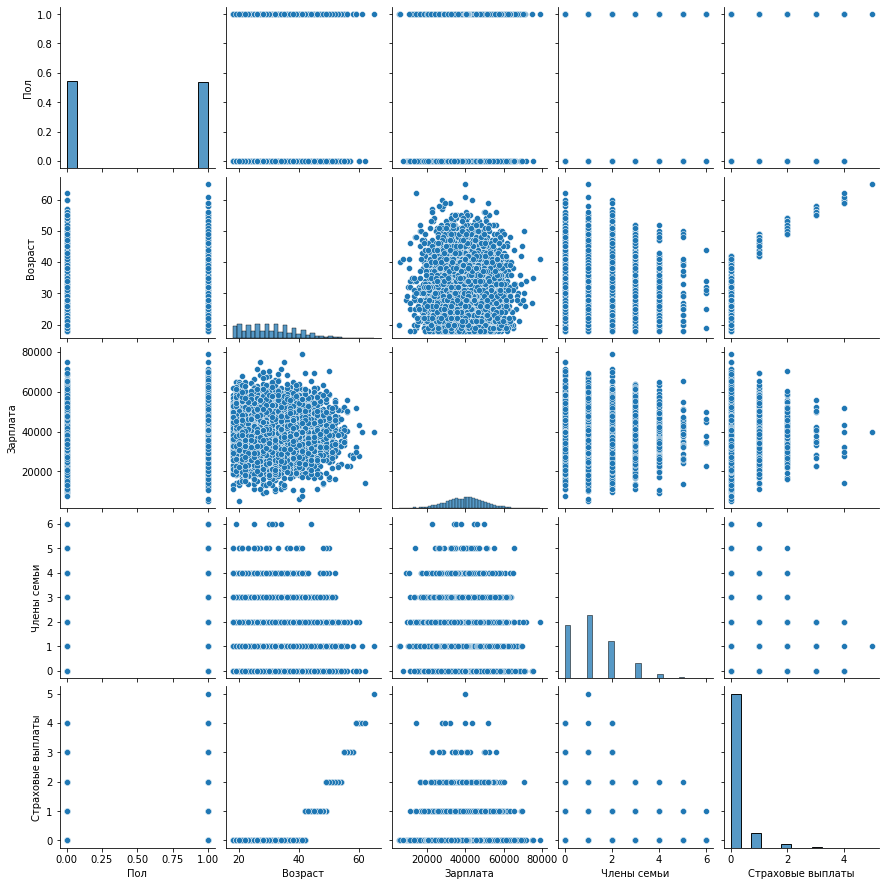

In [ ]:
#sns.pairplot(data);

In [ ]:
line_list = list(data.drop('Страховые выплаты', axis=1).columns)

for param in line_list:
    correlation = data['Страховые выплаты'].corr(data[param])
    print(f'Корреляция между страховыми выплатами и параметром "{param}" составляет: {correlation:0.2%}')


Корреляция между страховыми выплатами и параметром "Пол" составляет: 1.01%
Корреляция между страховыми выплатами и параметром "Возраст" составляет: 65.10%
Корреляция между страховыми выплатами и параметром "Зарплата" составляет: -1.50%
Корреляция между страховыми выплатами и параметром "Члены семьи" составляет: -3.63%


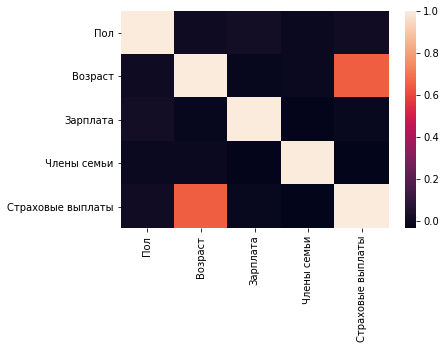

In [ ]:
corr=data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

      
Визуальный анализ данных позволил сделать некотоые выводы:<br/>
        
1) Страховые выплаты в основном не выплачиваются (причина не выяснялась)<br/>

2) Клиенты банка в равных долях по гендерному признаку - мужчины и женщины<br/>

3) Возраст клиентов банка: подавляющее большинство молодые люди от 19 до 35 лет, чуть меньше - от 35до 40 лет. Количество клиентов старше 50 меньше в половину.<br/>

4) Средняя зарплата клиентов банка от 32 до 47 тыс. Но есть небольшое количество клиентов с  зарплатой - более 65 тыс. И также небольшое количество клиентов с зарплатой менее 15 тыс.<br/>

5) Выявлена прямая корреляция между страховыми выплатами и возрастом. Чем старше человек, тем больше вероятность, что он получит страховую выплату.<br/>

6) Остальные признаки слабо коррелируют с целевым признаком.<br/>


In [ ]:
targets = data['Страховые выплаты']
features = data.drop('Страховые выплаты', axis=1)

In [ ]:
features.shape, targets.shape

((5000, 4), (5000,))

In [ ]:
train_features, test_features, train_targets, test_targets = train_test_split(features,
                                                                            targets, random_state=12345, test_size=0.25)

In [ ]:
train_features.shape, train_targets.shape, test_features.shape, test_targets.shape

((3750, 4), (3750,), (1250, 4), (1250,))

In [ ]:
train_targets

3369    1
1441    0
571     0
225     0
2558    0
       ..
3497    1
3492    0
2177    0
3557    0
4578    0
Name: Страховые выплаты, Length: 3750, dtype: int64

Решим задачу регрессии для исходных данных. Создадим модель линейной регресси по исходным данным.

In [ ]:
class LinearRegression:
    def fit(self, train_features, train_targets):
        X = np.concatenate((np.ones((train_features.shape[0],1)), train_features), axis=1)
        y = train_targets
        w = (np.linalg.inv((X.T @ X)) @ X.T) @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим модель на тренировочной выборке, выполним предсказание на тестовой выборке. Проверим качество модели.

In [ ]:
model = LinearRegression()
model.fit(train_features, train_targets)
prediction = model.predict(test_features)
print("R2 =", r2_score(test_targets, prediction))
print("MSE =", mean_squared_error(test_targets, prediction))

R2 = 0.4352275712702667
MSE = 0.11660517472525564


Значение R2 неотрицательное, больше нуля и меньше 1, близко к нулю. Значение MSE также в диапазоне [0,1]. Значение метрик вполне неплохие. Модель можно использовать.

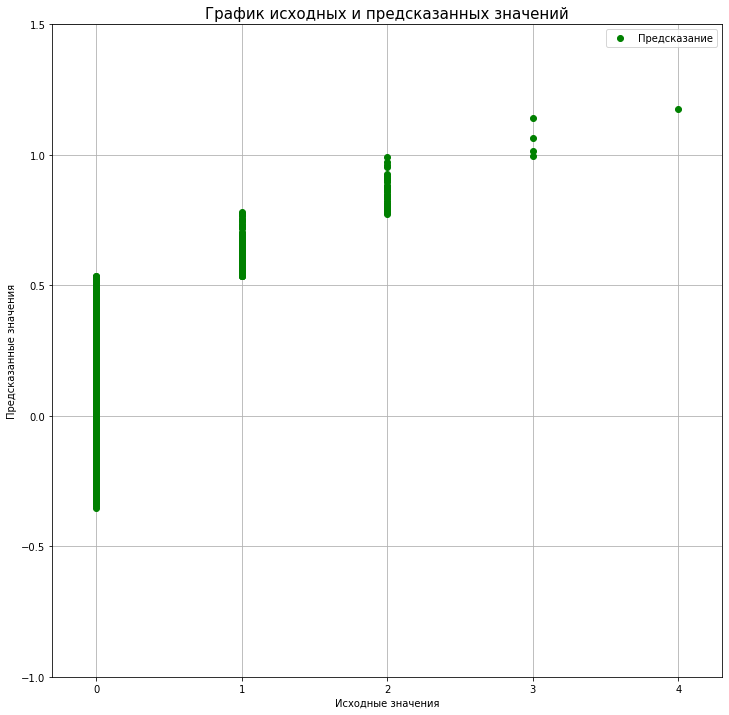

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(test_targets,prediction,'o',color='green')
plt.legend(['Предсказание'])
plt.title('График исходных и предсказанных значений', y=1, fontsize=15)
plt.xlabel('Исходные значения')
plt.ylabel('Предсказанные значения')
plt.xlim(-0.3,4.3)
plt.ylim(-1,1.5)
plt.grid(True)
plt.show()

Преобразуем матрицу, для того чтобы зашифровать данные.

Ответьте на вопрос и обоснуйте решение. <br/>
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)<br/>
 - a. Изменится. Приведите примеры матриц.
 - b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.*

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении признаков на обратимую матрицу качество линейной регрессии должно остаться прежним. Это связано со свойством умножения матрицы на обратную и умноженим матриц на единичную.

**Обоснование:**
$$
a = Xw
$$

$$
a' = XPw'
$$

$$
w = (X^T X)^{-1} X^T y
$$

$$
w' = (X^TX)^{-1}X^T(P^TP)^{-1}P^T y = (X^TX)^{-1}X^T((P^T)^{-1}P^T)P^{-1}y = (X^TX)^{-1}X^TEP^{-1}y = (X^TX)^{-1}X^TP^{-1}y =
$$

$$
= wP^{-1}y
$$

$$
a' = XPw' = XPwP^{-1} = Xw(PP^{-1}) = XwE = Xw
$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
.....
$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T P)^{-1}(X^TX)^{-1}X^T P^T y =
$$

$$
w'= (X^TX)^{-1}X^Ty(P^T)^{-1}P^TP^{-1}=
$$

$$
w'= (X^T X)^{-1}X^TyEP^{-1}=(X^TX)^{-1}X^TyP^{-1}=
$$

$$
w'= w P^{-1}
$$

$$
a = Xw
$$

$$
a' = XPw' = XPwP^{-1} = XwPP^{-1} = XwE= Xw = a
$$

$$
a' = a
$$

Таким образом, отсюда следует, что качество модели должно остаться прежним при умножении признаков на случайню обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**

1. Сгенерируем случайную матрицу размерностью 4х4 (так как матрица признаков, состоящая из данных тренировочной выборки, имеет размерность 3750х4, то подойдет матрица размерностью 4х4)
2. Проверим сгенерированную матрицу на обратимость
3. Выполним умножение матрицы признаков из данных тренировочной выборки на сгенерированную матрицу
4. Выполним умножение матрицы признаков из данных тестовой выборки на сгенерированную матрицу
5. Обучим созданную ранее модель линейной регрессии на новых данных (полученная новая матрица)
6. Используя обученную модель, предскажем значения
7. Оценим качество полученной модели
8. Сравним качество полученной модели с исходной моделью


**Обоснование**

Таким образом, для обратимого преобразования данных можно использовать случайную обратимую матрицу. Умножив матрицу признаков на случайную обратимую матрицу заданного размера, качество модели не изменится.

$$
XP = (XP)P^{-1} = X(PP^{-1}) = XE = X
$$

Восстановить данные можно также путем умножения преобразованной матрицы на обратную. Обратная матрица вычисляется как произведение 1 деленой на определитель матрицы и транспонированной матрицы дополнений исходной матрицы.


## Проверка алгоритма

In [ ]:
#Сгенерируем случайную матрицу размерностью 4х4
P = np.random.normal(7, size=(4,4))
P


array([[9.22964851, 5.76480339, 5.58960362, 7.5359585 ],
       [6.69928252, 7.79250745, 6.42213417, 7.13708042],
       [8.13665658, 7.44197307, 7.12693257, 8.72467548],
       [6.94657454, 7.56560839, 7.49648208, 7.92804459]])

Проверим, является ли матрица обратимой.

In [ ]:
np.linalg.inv(P)

array([[ 0.49836819,  0.08748633, -0.70725767,  0.22584568],
       [-0.1217855 ,  0.78594021, -0.06188294, -0.523665  ],
       [ 0.31427486, -0.58032834, -1.15185986,  1.49129979],
       [-0.61762093, -0.27792795,  1.76791349, -0.98214781]])

In [ ]:
X = np.array(train_features)
y = np.array(train_targets)

In [ ]:
XP = X @ P
XP

array([[294851.21373518, 269747.83332093, 258284.19706735,
        316155.61088062],
       [468908.42452928, 428928.35881687, 410735.25848106,
        502791.50440994],
       [334637.90924373, 306122.01897251, 293129.93360495,
        358820.47689538],
       ...,
       [363999.39613958, 332989.01939045, 318850.27968585,
        390301.07830998],
       [407821.66540393, 373044.54834201, 357230.59488374,
        437294.96955574],
       [332102.87502109, 303780.55884669, 290900.86960614,
        356102.36416096]])

In [ ]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
yP = y

In [ ]:
yP

array([1, 0, 0, ..., 0, 0, 0])

Создадим датафрейм с преобразованными данными.

In [ ]:
XP_df = pd.DataFrame(XP, columns = train_features.columns)

In [ ]:
XP_df

,Пол,Возраст,Зарплата,Члены семьи
0,294851.213735,269747.833321,258284.197067,316155.610881
1,468908.424529,428928.358817,410735.258481,502791.504410
2,334637.909244,306122.018973,293129.933605,358820.476895
3,367211.332712,335921.081277,321663.352441,393747.727142
4,411949.792655,376836.121242,360849.711683,441719.959092
...,...,...,...,...
3745,261468.046233,239214.620820,229044.265290,280361.840324
3746,184917.470680,169181.241303,161991.175136,198281.683853
3747,363999.396140,332989.019390,318850.279686,390301.078310
3748,407821.665404,373044.548342,357230.594884,437294.969556


In [ ]:
y_df = pd.DataFrame(yP)

In [ ]:
y_df

,0
0,1
1,0
2,0
3,0
4,0
...,...
3745,1
3746,0
3747,0
3748,0


In [ ]:
XP_test = np.array(test_features) @ P
YP_test = np.array(test_targets)

In [ ]:
XP_test_df = pd.DataFrame(XP_test , columns = test_features.columns)
YP_test_df = pd.DataFrame(YP_test)

In [ ]:
XP_test_df, YP_test_df

(                Пол        Возраст       Зарплата    Члены семьи
 0     317578.469422  290524.364861  278192.286778  340529.579599
 1     351038.756073  321153.795852  307506.893652  376406.223350
 2     342823.743880  313616.738788  300299.914241  367594.719853
 3     283289.634796  259136.512942  248145.696291  303761.448354
 4     325768.720267  298028.677989  285370.596426  349311.351724
 ...             ...            ...            ...            ...
 1245  236327.827160  216235.532894  207029.156083  253402.972104
 1246  471363.561946  431175.855055  412889.405566  505425.554108
 1247  344424.278067  315073.963372  301699.612219  369311.106628
 1248  336294.320765  307639.782811  294579.101778  360593.568227
 1249  253385.231200  231834.760912  221969.784137  271695.052451
 
 [1250 rows x 4 columns],
       0
 0     0
 1     2
 2     0
 3     0
 4     0
 ...  ..
 1245  2
 1246  0
 1247  0
 1248  0
 1249  2
 
 [1250 rows x 1 columns])

Обучим модель на новых данных, сделаем предсказание, оценим качество модели.

In [ ]:
model2 = LinearRegression()
model2.fit(XP, yP)
prediction2 = model.predict(XP_test_df)
print("R2 =",r2_score(YP_test_df, prediction))
print("MSE =", mean_squared_error(YP_test_df, prediction))

R2 = 0.4352275712702667
MSE = 0.11660517472525564


Видим, метрики R2 и MSE точно такие же, что и в у ранее созданной модели.

**Выводы:**

- Разработан метод преобразования данных, позволяющий защитить данные клиентов страховой компании "Хоть потоп".


- Алгоритм преобразования основан на свойствах умножения матриц на обратную и единичную матрицы. Результатом умножения матрицы на обратную ей, получается единичная матрица, а результатом умножения матрицы на единичную, получается сама матрица.


- Таким образом, матрица признаков, умноженная на матрицу, состоящую из случайных значений, представлена матрицей с защищенными персональными данными.

- Создана модель линейной регрессии. Модель обучена на тренировочной выборке и предсказаны данные на тестовой выборке. Рассчитаны метрики  R2 = 0.4352275712702667, MSE = 0.11660517472525564.


- Модель линейной регрессии обучена на новых преобразованных данных. Выполнено предсказание. Рассчитаны метрики R2 = 0.4352275712702667, MSE = 0.11660517472525564.


- Качество модели не ухудшилось.